<a href="https://colab.research.google.com/github/yebiny/-Lecture-Data_analysis_LV1/blob/main/lecture-note-comment/10_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. 데이터 전처리 실습
---
* 날짜:
* 이름:


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')


## **데이터 소개**
---


> * 데이터 출처 : https://www.kaggle.com/c/titanic/data?select=train.csv
> * 추가 설명: https://dacon.io/competitions/open/235539/overview/description

타이타닉은 역사상 가장 유명한 난파선 중 하나입니다.

1912년 4월 15일, 타이타닉은 항해중 빙산과의 충돌로 인해 침몰합니다. 탑승인원 2224명 중 1502명이 사망한 비극적인 사건이었고, 선박의 안전규정을 개선시키는 계기가 되었습니다.

이 과제에서는 여러분은 어떤 종류의 사람들이 많이 살아남았는지에 대한 분석을 해야 합니다.
그리고 머신러닝을 이용해 어떤 승객이 생존했을지 예측해보세요. 


|index|column|설명|
|--|--|--|
|0.| PassengerId||
|1.| Survived | 생존여부|
|2. |Pclass| 티켓 등급|
|3.| Name |이름|
|4.| Sex| 성별|
|5.| Age |나이|
|6.| SibSp| 타이타닉호에 탑승한 형제/배우자 수|
|7.| Parch |타이타닉호에 탑승한 부모/자녀 수 |
|8.| Ticket |티켓 번호|
|10| Fare |여객 요금|
|11.| Cabin| 객실 번호|
|12.| Embarked| 승선항|


코랩에 파일을 빠르게 업로드를 하기 위해서는 아래 코드를 실행합니다.


```
from google.colab import files
files.upload()
```



In [ ]:
from google.colab import files
files.upload()

## **데이터 정제**

---
### **데이터 확인**

---

####**데이터 가져오기**

In [4]:
df = pd.read_csv("train.csv")

####**불필요 속성 제거**

In [5]:
drop_list = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train = df.drop(drop_list, axis=1)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


---
###**결측값 처리**
---

#### **`Embarked` 의 결측치를 `S`로 처리**

In [7]:
train["NewCol"] = train["Embarked"]
train = train.drop(["NewCol"], axis=1)

In [8]:
train['Embarked'] = train['Embarked'].fillna("S")

#### **`Age` 의 결측치를 중앙값으로 처리**

In [9]:
median_age = train['Age'].median()
train['Age'] = train['Age'].fillna( median_age )

#### **데이터셋 결측치 변경 확인**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


---
###**이상값 처리**
---

#### **`Fare` 의 이상치 데이터셋 확인**

In [11]:
mask = train['Fare']>150
train[mask]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.00,3,2,263.0000,S
88,1,1,female,23.00,3,2,263.0000,S
118,0,1,male,24.00,0,1,247.5208,C
258,1,1,female,35.00,0,0,512.3292,C
268,1,1,female,58.00,0,1,153.4625,S
297,0,1,female,2.00,1,2,151.5500,S
299,1,1,female,50.00,0,1,247.5208,C
305,1,1,male,0.92,1,2,151.5500,S
311,1,1,female,18.00,2,2,262.3750,C
318,1,1,female,31.00,0,2,164.8667,S


#### **`Fare` 의 이상치 처리**

In [12]:
train.loc[ mask, 'Fare' ] = 150

#### **이상치 처리결과 확인**

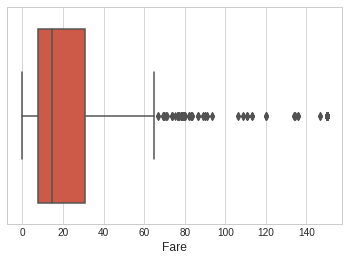

In [13]:
sns.boxplot(x='Fare', data=train)


## **데이터 변환**
---
|feature|현재값 | 처리값|
|--|--|--|
| Survived|||
	Pclass | 1/2/3 | 0/1/2
	Sex | Male/Female | 0/1
  Age | 0-15 / 15-30 / 30-45 / 45- | 0/1/2/3
  ibSp| 0/1/2..n
  Parch| 0/2/2..n
  Fare| 0 - 200 | 0-2	
  Embarked| S/C/Q | 0/1/2

---
###**데이터 형식 변형**
---

#### **`Pclass` : (1/2/3) -> (0/1/2)**

In [14]:
train["Pclass"] = train["Pclass"]-1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


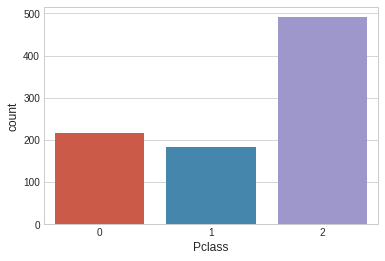

In [15]:
sns.countplot(train['Pclass'])
plt.show()

#### **`Sex` : (Male/Female) ->	0/1**

In [16]:
mask_m = train['Sex'] == 'male'
mask_f = train['Sex'] == 'female'
train.loc[mask_m, 'Sex'] = 0
train.loc[mask_f, 'Sex'] = 1

In [17]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,22.0,1,0,7.2500,S
1,1,0,1,38.0,1,0,71.2833,C
2,1,2,1,26.0,0,0,7.9250,S


#### **`Embarked` : (S/C/Q) ->	(0/1/2)**


In [18]:
mask_s = train['Embarked'] =='S'
mask_c = train['Embarked'] =='C'
mask_q = train['Embarked'] =='Q'

train.loc[mask_s, 'Embarked'] = 0
train.loc[mask_c, 'Embarked'] = 1
train.loc[mask_q, 'Embarked'] = 2

In [19]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,22.0,1,0,7.2500,0
1,1,0,1,38.0,1,0,71.2833,1
2,1,2,1,26.0,0,0,7.9250,0


---
###**이산화**
---

#### **`Age` : (0-15 / 15-30 / 30-45 / 45-) ->	(0/1/2/3)**

In [20]:
bin = [0, 15, 30, 45, 100]
group_name = [0,1,2,3]
train['Age'] = pd.cut(train['Age'], bins=bin, labels=group_name)

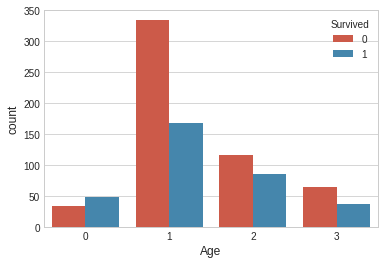

In [21]:
sns.countplot(data = train, x='Age', hue='Survived')
plt.show()

---
###**정규화**
---

#### **`Fare` : (0 - 150) -> (0-1.5)**

In [22]:
train['Fare'] = train['Fare'] / 100

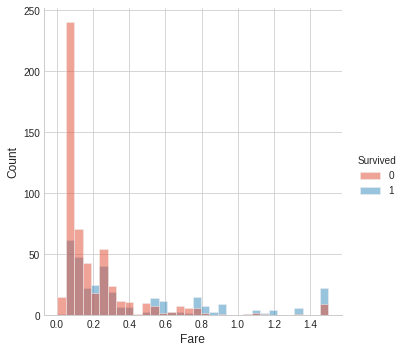

In [23]:
sns.displot(data=train, x='Fare', hue='Survived')
plt.show()


## **전처리 플로우 정리**

---
###**테스트셋을 위한 전처리 과정 함수화**
---

In [24]:
def preproces_titanic(df):

  # 필요없는 속성 제거
  drop_list = ['PassengerId', 'Name', 'Ticket', 'Cabin']
  df_pre = df.drop(drop_list, axis=1)

  # 결측값 처리
  df_pre['Embarked'] = df_pre['Embarked'].fillna("S")
  median_age = df_pre['Age'].median()
  df_pre['Age'] = df_pre['Age'].fillna( median_age )

  # 이상값 처리
  mask = df_pre['Fare']>150
  df_pre.loc[ mask, 'Fare' ] = 150
  
  # 데이터 변환
  df_pre["Pclass"] = df_pre["Pclass"]-1

  mask_m = df_pre['Sex'] == 'male'
  mask_f = df_pre['Sex'] == 'female'
  df_pre.loc[mask_m, 'Sex'] = 0
  df_pre.loc[mask_f, 'Sex'] = 1
  
  # 데이터 형식 변경
  mask_s = df_pre['Embarked'] =='S'
  mask_c = df_pre['Embarked'] =='C'
  mask_q = df_pre['Embarked'] =='Q'
  df_pre.loc[mask_s, 'Embarked'] = 0
  df_pre.loc[mask_c, 'Embarked'] = 1
  df_pre.loc[mask_q, 'Embarked'] = 2

  # 이산화
  bin = [0, 15, 30, 45, 100]
  group_name = [0,1,2,3]
  df_pre['Age'] = pd.cut(df_pre['Age'], bins=bin, labels=group_name)
  
  # 정규화
  df_pre['Fare'] = df_pre['Fare'] / 100
  
  return df_pre

#### **train 데이터셋**

In [25]:
df_train = pd.read_csv("train.csv")
train = preproces_titanic(df_train)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,1,1,0,0.072500,0
1,1,0,1,2,1,0,0.712833,1
2,1,2,1,1,0,0,0.079250,0
3,1,0,1,2,1,0,0.531000,0
4,0,2,0,2,0,0,0.080500,0


#### **test 데이터셋**

In [26]:
df_test = pd.read_csv("test.csv")
test = preproces_titanic(df_test)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,2,0,0,0.078292,2
1,2,1,3,1,0,0.070000,0
2,1,0,3,0,0,0.096875,2
3,2,0,1,0,0,0.086625,0
4,2,1,1,1,1,0.122875,0


---
###**전처리 결과 확인**
---

#### **train 데이터셋**

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


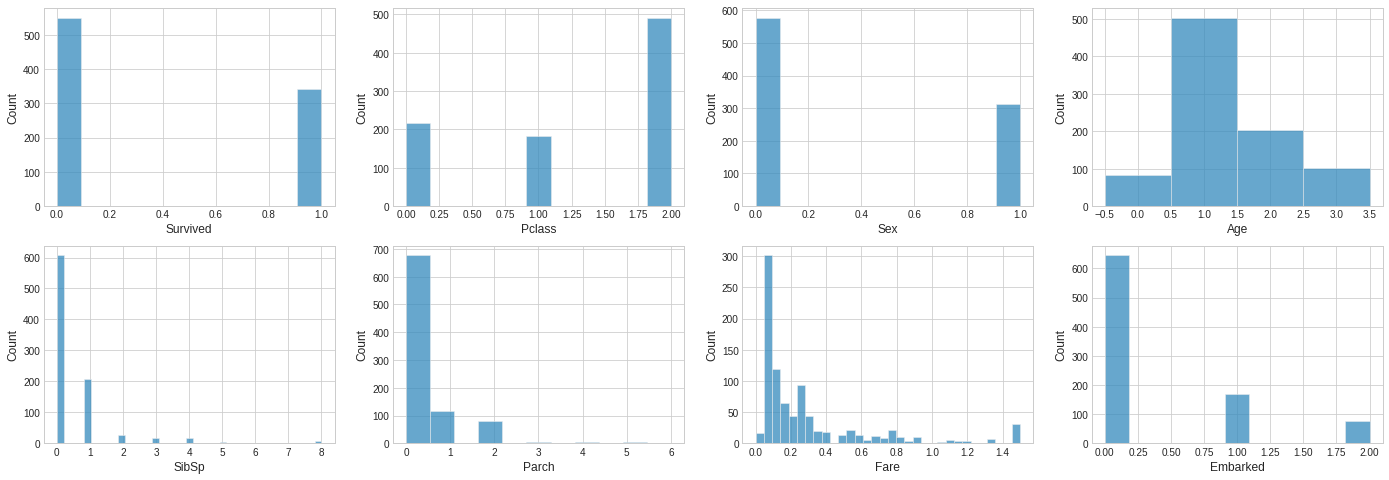

In [27]:
f, ax = plt.subplots(2, 4, figsize=(24,8))
ax = ax.flatten()

col_list = list(train.columns)
print(col_list)

for i in range(len(col_list)):
  sns.histplot(data=train, x = col_list[i], ax=ax[i])
plt.show()

#### **test 데이터셋**

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


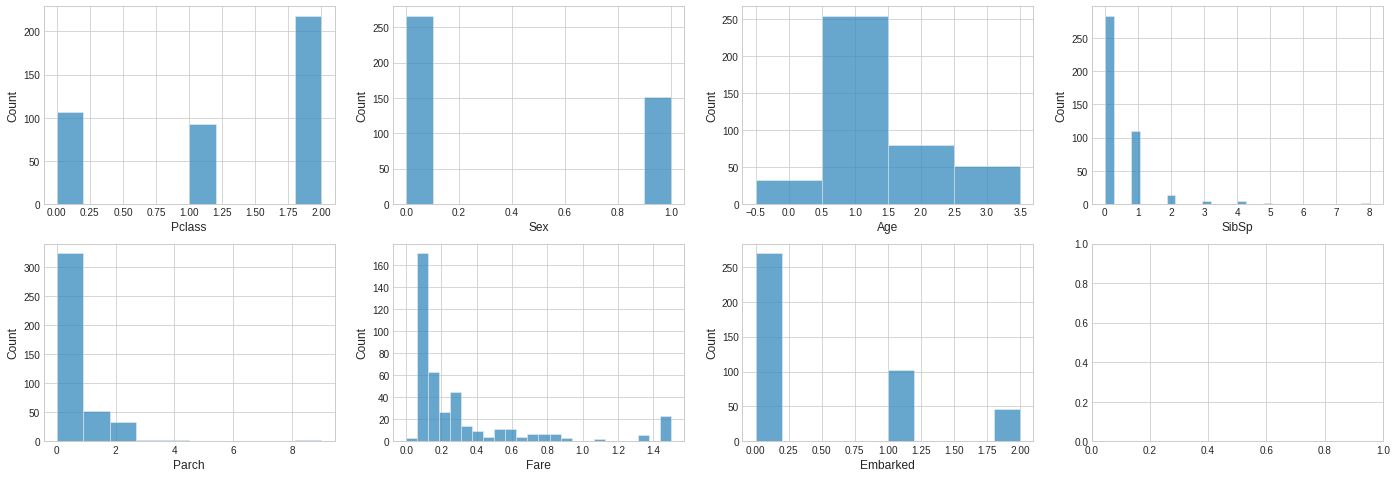

In [28]:
f, ax = plt.subplots(2, 4, figsize=(24,8))
ax = ax.flatten()

col_list = list(test.columns)
print(col_list)

for i in range(len(col_list)):
  sns.histplot(data=test, x = col_list[i], ax=ax[i])
plt.show()

---
###**전처리 데이터 저장**
---

In [29]:
train.to_csv("train_pre_titanic.csv")
test.to_csv("test_pre_titanic.csv")